vertex: 36063 in-degree: 0 out-degree: 1 age: 36063
vertex: 9075 in-degree: 4 out-degree: 1 age: 9075
vertex: 5967 in-degree: 3 out-degree: 1 age: 5967
vertex: 1113 in-degree: 7 out-degree: 1 age: 1113
vertex: 25 in-degree: 84 out-degree: 1 age: 25
vertex: 10 in-degree: 541 out-degree: 1 age: 10
vertex: 5 in-degree: 140 out-degree: 1 age: 5
vertex: 2 in-degree: 459 out-degree: 1 age: 2
vertex: 1 in-degree: 520 out-degree: 1 age: 1
vertex: 0 in-degree: 210 out-degree: 0 age: 0
Nowhere else to go... We found the main hub!


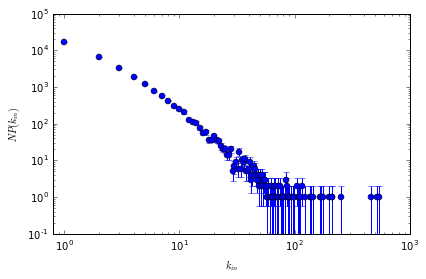

In [2]:
#! /usr/bin/env python

# We will need some things from several places
from __future__ import division, absolute_import, print_function
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *  # for plotting
from numpy.random import *  # for random sampling
%matplotlib inline
seed(42)

# We need to import the graph_tool module itself
from graph_tool.all import *

# let's construct a Price network (the one that existed before Barabasi). It is
# a directed network, with preferential attachment. The algorithm below is
# very naive, and a bit slow, but quite simple.

# We start with an empty, directed graph
g = Graph()

# We want also to keep the age information for each vertex and edge. For that
# let's create some property maps
v_age = g.new_vertex_property("int")
e_age = g.new_edge_property("int")

# The final size of the network
N = 100000

# We have to start with one vertex
v = g.add_vertex()
v_age[v] = 0

# we will keep a list of the vertices. The number of times a vertex is in this
# list will give the probability of it being selected.
vlist = [v]

# let's now add the new edges and vertices
for i in range(1, N):
    # create our new vertex
    v = g.add_vertex()
    v_age[v] = i

    # we need to sample a new vertex to be the target, based on its in-degree +
    # 1. For that, we simply randomly sample it from vlist.
    i = randint(0, len(vlist))
    target = vlist[i]

    # add edge
    e = g.add_edge(v, target)
    e_age[e] = i

    # put v and target in the list
    vlist.append(target)
    vlist.append(v)

# now we have a graph!

# let's do a random walk on the graph and print the age of the vertices we find,
# just for fun.

v = g.vertex(randint(0, g.num_vertices()))
while True:
    print("vertex:", int(v), "in-degree:", v.in_degree(), "out-degree:",
          v.out_degree(), "age:", v_age[v])

    if v.out_degree() == 0:
        print("Nowhere else to go... We found the main hub!")
        break

    n_list = []
    for w in v.out_neighbours():
        n_list.append(w)
    v = n_list[randint(0, len(n_list))]

# let's save our graph for posterity. We want to save the age properties as
# well... To do this, they must become "internal" properties:

g.vertex_properties["age"] = v_age
g.edge_properties["age"] = e_age

# now we can save it
g.save("price.xml.gz")


# Let's plot its in-degree distribution
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e5)
gca().set_xlim(0.8, 1e3)
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()
savefig("price-deg-dist.pdf")
savefig("price-deg-dist.png")


In [3]:
g = load_graph("price.xml.gz")
age = g.vertex_properties["age"]

pos = sfdp_layout(g)
graph_draw(g, pos, output_size=(1000, 1000), vertex_color=[1,1,1,0],
           vertex_fill_color=age, vertex_size=1, edge_pen_width=1.2,
           vcmap=matplotlib.cm.gist_heat_r, output="price.png")

KeyboardInterrupt: 